## 11주차 참고자료 : 영상처리-히스토그램분석

In [1]:
# 공통으로 사용하는 라이브러리 가져오기
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (6,3)
plt.rcParams['font.family'] = 'Malgun Gothic'  # '맑은 고딕'으로 설정 
plt.rcParams['axes.unicode_minus'] = False     # 그래프에서 (-)숫자표시

### OpenCV : 영상처리 라이브러리

#### 라이브러리 설치

In [ ]:
!pip install opencv-python

In [ ]:
!pip install opencv-contrib-python

### 정규화된 히스토그램 
이미지의 화소값을 일정크기의 히스토그램으로 정규화해서 나타내기

hsize: [32], gap: 8.0
ranges_gap: [  0.   8.  16.  24.  32.  40.  48.  56.  64.  72.  80.  88.  96. 104.
 112. 120. 128. 136. 144. 152. 160. 168. 176. 184. 192. 200. 208. 216.
 224. 232. 240. 248. 256.]


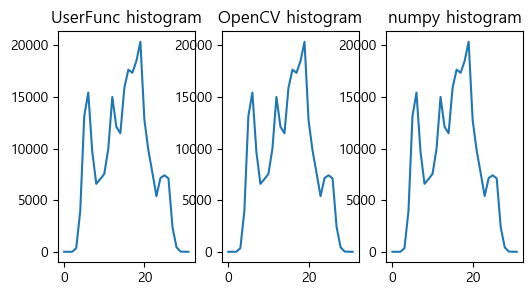

In [2]:
import cv2

def calc_histo(image, hsize, ranges=[0, 256]):  # 행렬 원소의 1차원 히스토그램 계산
    hist = np.zeros((hsize, 1), np.float32)  # 히스토그램 누적 행렬
    gap = ranges[1] / hsize  # 계급 간격

    for i in range(image.shape[0]):  # 2차원 행렬 순회 방식
        for j in range(image.shape[1]):
            idx = int(image.item(i,j) / gap)
            hist[idx] += 1
    return hist

image = cv2.imread("image/lenna.bmp", cv2.IMREAD_GRAYSCALE)  # (컬러)영상 흑백으로 읽기
if image is None: 
    raise Exception("영상 파일 읽기 오류 발생")

hsize, ranges = [32], [0, 256]    # 히스토그램 간격수, 값 범위
gap = ranges[1]/hsize[0]
ranges_gap  = np.arange(0, ranges[1]+1, gap)
print(f'hsize: {hsize}, gap: {gap}')    # 히스토그램 크기, 히스토그램 간격(하나의 크기)
print(f'ranges_gap: {ranges_gap}')      # 히스토그램 범위 

# 히스토그램 값 비교하기
hist1 = calc_histo(image, hsize[0], ranges)               # 사용자정의 히스토그램함수
hist2 = cv2.calcHist([image], [0], None, hsize, ranges)  # OpenCV 히스토그램
hist3, bins = np.histogram(image, ranges_gap )           # numpy 히스토그램

# print("User   히스토그램 값: \n", hist1.flatten())     # 행렬을 벡터로 변환하여 출력
# print("OpenCV 히스토그램 값: \n", hist2.flatten())     # 행렬을 벡터로 변환하여 출력
# print("numpy  히스토그램 값: \n", hist3)               # 행렬을 벡터로 변환하여 출력

plt.subplot(1, 3, 1)
plt.plot(hist1)
plt.title('UserFunc histogram')

plt.subplot(1, 3, 2)
plt.plot(hist2)
plt.title('OpenCV histogram')

plt.subplot(1, 3, 3)
plt.plot(hist3)
plt.title('numpy histogram')

plt.show()

cv2.imshow("image", image)   #화면에 이미지 띄우기
cv2.waitKey(0)               #키가 입력될 때까지 기다리기
cv2.destroyAllWindows()      #화면 닫기

### OpenCV 히스토그램 분석 : Gray scale
흑백 이미지에 사용된 색상의 밝기 분포를 확인할 수 있다 

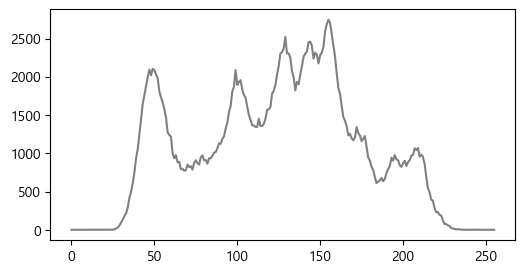

In [3]:
import sys
import cv2

# 컬러 영상의 히스토그램
src = cv2.imread('image/lenna.bmp', cv2.IMREAD_GRAYSCALE) #(컬러)영상 흑백으로 읽기

if src is None:
    print('Image load failed!')
    sys.exit()
    
# cv2.calcHis(입력영상, 채널, mask사용, 계급개수, 간격, 계급범위)                  
hist = cv2.calcHist([src], [0], None, [256], [0, 256]) 

hist.flatten()   # 값 평활화
plt.plot(hist, color='gray')
plt.show()

cv2.imshow("image", src)     #화면에 이미지 띄우기
cv2.waitKey(0)               #키가 입력될 때까지 기다리기
cv2.destroyAllWindows()      #화면 닫기

### OpenCV 히스토그램 분석 : Color scale
컬러 이미지에 사용된 rgb 색상의 분포를 확인할 수 있다 

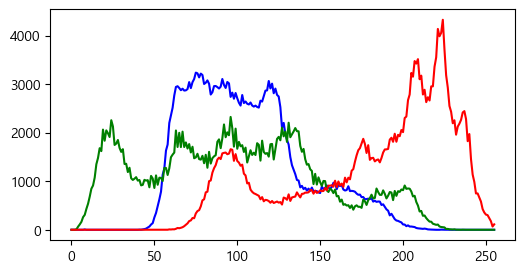

In [4]:
import sys
import cv2

# 컬러 영상의 히스토그램
src = cv2.imread('image/lenna.bmp') #영상 읽기

if src is None:
    print('Image load failed!')
    sys.exit()

colors = ['b', 'g', 'r']     # 색상을 표시하기 위한 리스트
bgr_planes = cv2.split(src)  # (컬러이미지 데이터) 색상 채널로 분리 

for (p, c) in zip(bgr_planes, colors):
#     print(p,'-',p,'\n----------\n') # 색상 채널의 값 출력
    hist = cv2.calcHist([p], [0], None, [256], [0, 256])
    plt.plot(hist, color=c)   #  선 그래프
plt.show()

cv2.imshow("image", src)   #화면에 이미지 띄우기
cv2.waitKey(0)               #키가 입력될 때까지 기다리기
cv2.destroyAllWindows()      #화면 닫기

### OpenCV 히스토그램 분석 : Gray scale Histogram
흑백 이미지 밝기값에 대한 정규화 히스토그램 분포 나타내기

In [5]:
import cv2

def getGrayHistImage(hist):
    h, w = (100, 256)  # 영상 크기
    imgHist = np.full((h, w), 255, dtype=np.uint8)

    histMax = np.max(hist)
    print(f'histMax:{histMax}')
    for x in range(256):
        pt1 = (x, 100)
        pt2 = (x, 100 - int(hist[x, 0] * 100 / histMax))
        cv2.line(imgHist, pt1, pt2, 0)

    return imgHist

src = cv2.imread('image/lenna.bmp', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([src], [0], None, [256], [0, 256])
histImg = getGrayHistImage(hist)

cv2.imshow('src', src)
cv2.imshow('histImg', histImg)
cv2.waitKey()
cv2.destroyAllWindows()

histMax:2745.0


### 히스토그램 정규화(Normalization)
- 영상에서 특정 부분에 몰려 있는 값을 전체 영역으로 골고루 분포하게 하도록 만드는 방법을 Normalization(정규화) 라고 한
- OpenCV는 cv2.normalize()라는 함수로 영상 전체에 값이 골고루 분포하게끔 한다.

In [6]:
import cv2

def draw_histogram(hist, shape=(200, 256*2)): # 히스토그램 그리기
    hist_img = np.full(shape, 255, np.uint8)  # shape 크기의 행렬 값을 255으로 채워라
    #cv2.normalize(정규화이전, 정규화이전, 정규화구간, 정규화구간, 정규화알고리즘)
    cv2.normalize(hist, hist, 0, shape[0], cv2.NORM_MINMAX)
    gap = hist_img.shape[1]/hist.shape[0]             # 한 계급 너비

    for i, h in enumerate(hist):
        x = int(round(i * gap))                       # 막대 사각형 시작 x 좌표
        w = int(round(gap))
        roi = (x, 0, w, int(h))
        cv2.rectangle(hist_img, roi, 0, cv2.FILLED)

    return cv2.flip(hist_img, 0)  # 영상 상하 뒤집기 후 반환
    

src = cv2.imread("image/lenna.bmp", cv2.IMREAD_GRAYSCALE)  # 영상 읽기
if src is None: 
    raise Exception("영상 파일 읽기 오류")
    
hist = cv2.calcHist([src], [0], None, [256], [0, 256])
hist_img = draw_histogram(hist)

cv2.imshow("image", src)
cv2.imshow("hist_img", hist_img)
cv2.waitKey()
cv2.destroyAllWindows()

----------------

### 히스토그램 스트레칭(Stretching)
각 명암 분포가 좁은 히스토그램을 좌우로 잡아당겨(스트레칭해서) 고른 명암 분포를 가진 히스토그램이 되게 하는 것

In [7]:
import cv2

def draw_histogram(hist, shape=(200, 256)): # 히스토그램 그리기
    hist_img = np.full( shape, 255, np.uint8)
    cv2.normalize(hist, hist, 0, shape[0], cv2.NORM_MINMAX)
    gap = hist_img.shape[1]/hist.shape[0]             # 한 계급 너비

    for i, h in enumerate(hist):
        x = int(round(i * gap))                         # 막대 사각형 시작 x 좌표
        w = int(round(gap))
        roi = (x, 0, w, int(h))
        cv2.rectangle(hist_img, roi, 0, cv2.FILLED)

    return cv2.flip(hist_img, 0)


def search_value_idx(hist, bias = 0):  
    for i in range(hist.shape[0]):
        idx = np.abs(bias - i)                      # 검색 위치 (처음 또는 마지막)
        if hist[idx] > 0:  return idx              # 위치 반환
    return -1                                      # 대상 없으면 반환

src = cv2.imread("image/hist_stretch.jpg", cv2.IMREAD_GRAYSCALE)   # 영상읽기
if src is None: 
    raise Exception("영상 파일 읽기 오류")

bsize, ranges = [64], [0,256]                         # 계급 개수 및 화소 범위
hist = cv2.calcHist([src], [0], None, bsize, ranges)  # 원본 히스토그램 계산
hist_img = draw_histogram(hist, (200,360))            # 원본 영상 히스토그램 그리기

# 히스토그램의 높은 화소값 & 낮은 화소값
bin_width  = ranges[1]/bsize[0]             # 계급 너비
high = search_value_idx(hist, bsize[0] - 1) * bin_width
low  = search_value_idx(hist, 0) * bin_width
print("high_value = ", high)
print("low_value = " , low)


# 히스토그램 스트레칭하기 --------
# 수식 적용하여 새 화소값의 인덱스 생성하기
idx = np.arange(0, 256)
idx = (idx - low) * 255/(high-low) # 수식 적용하여 인덱스 생성
idx[0:int(low)] = 0
idx[int(high+1):] = 255

# 룩업 테이블 사용하여 이미지 전체에 새 화소값 적용
dst = cv2.LUT(src, idx.astype('uint8'))  # 새 화소값 적용한 영상(dst) 생성
# 룩업 테이블 사용하지 않고 직접 구현하는 방법 
# dst = np.zeros(src.shape, dtype=src.dtype)
# for i in range(src.shape[0]):
#     for j in range(src.shape[1]):
#         dst[i,j] = idx[src[i,j]]
#---------------------------------------

hist_dst = cv2.calcHist([dst], [0], None, bsize, ranges)  # 결과 영상 히스토그램 재계산
hist_dst_img = draw_histogram(hist_dst,(200,360))         # 결과 영상 히스토그램 그리기


cv2.imshow("image", src);         
cv2.imshow("hist_img", hist_img)

cv2.imshow("dst", dst);             
cv2.imshow("hist_dst_img", hist_dst_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

high_value =  180.0
low_value =  52.0


----

### 히스토그램 평활화(Equalization)
특정 부분에서만 한쪽으로 치우친 명암 분포를 가진 영상을 히스토그램의 재 분배 과정을 거쳐 균등한 히스토그램 분포를 갖게 하는 방법--> **영상의 인지도 높이며, 영상의 화질 개선**

In [1]:
import numpy as np
import cv2

def draw_histogram(hist, shape=(200, 256)):
    hist_img = np.full( shape, 255, np.uint8)
    cv2.normalize(hist, hist, 0, shape[0], cv2.NORM_MINMAX)
    gap = hist_img.shape[1]/hist.shape[0]             # 한 계급 너비

    for i, h in enumerate(hist):
        x = int(round(i * gap))                         # 막대 사각형 시작 x 좌표
        w = int(round(gap))
        roi = (x, 0, w, int(h))
        cv2.rectangle(hist_img, roi, 0, cv2.FILLED)

    return cv2.flip(hist_img, 0)


def search_value_idx(hist, bias = 0):
    for i in range(hist.shape[0]):
        idx = np.abs(bias - i)                     # 검색 위치 (처음 또는 마지막)
        if hist[idx] > 0:  return idx              # 위치 반환
    return -1                                      # 대상 없으면 반환

src = cv2.imread("image/hist_equalize.jpg", cv2.IMREAD_GRAYSCALE)   # 영상읽기
if src is None: 
    raise Exception("영상 파일 읽기 오류")

# 원본 히스토그램  ------
bins, ranges = [256], [0, 256]
hist = cv2.calcHist([src], [0], None, bins, ranges)    # 히스토그램 계산


# 히스토그램 누적합 정규화 ------
accum_hist = np.zeros(hist.shape[:2], np.float32)
accum_hist[0] = hist[0]
for i in range(1, hist.shape[0]):
    accum_hist[i] = accum_hist[i - 1] + hist[i]

accum_hist = (accum_hist / sum(hist)) * 255                # 누적합의 정규화
dst1 = [[accum_hist[val] for val in row] for row in src] # 화소값 할당
dst1 = np.array(dst1, np.uint8)

# #numpy 함수 및 룩업 테이블 사용
# accum_hist = np.cumsum(hist)                      # 누적합 계산
# cv2.normalize(accum_hist, accum_hist, 0, 255, cv2.NORM_MINMAX)  # 정규화
# dst1 = cv2.LUT(src, accum_hist.astype("uint8"))  #룩업 테이블로 화소값할당


# 히스토그램 평활화 -----
dst2 = cv2.equalizeHist(src) # OpenCV 히스토그램 평활화
hist1 = cv2.calcHist([dst1], [0], None, bins, ranges)   # 히스토그램 계산
hist2 = cv2.calcHist([dst2], [0], None, bins, ranges)   # 히스토그램 계산
hist_img = draw_histogram(hist)
hist_img1 = draw_histogram(hist1)
hist_img2 = draw_histogram(hist2)



cv2.imshow("image", src)             
cv2.imshow("hist_img", hist_img)    # 1.원본 히스토그램

cv2.imshow("dst1_User", dst1)
cv2.imshow("User_hist", hist_img1)  # 2.누적합의 정규화 히스토그램

cv2.imshow("dst2_OpenCV", dst2)
cv2.imshow("OpenCV_hist", hist_img2)# 3.히스토그램 평활화 적용
cv2.waitKey(0)
cv2.destroyAllWindows()

-------- 

### 가우시안 필터 적용
영상을 부드럽게 처리(blurring)

In [2]:
import sys
import numpy as np
import cv2

src = cv2.imread('image/lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

cv2.imshow('src', src)

for sigma in range(1, 6):
    # sigma 값을 이용하여 가우시안 필터링
    dst = cv2.GaussianBlur(src, (0, 0), sigma)

    desc = 'sigma = {}'.format(sigma)
    cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                1.0, 255, 1, cv2.LINE_AA)

    cv2.imshow('dst', dst)
    cv2.waitKey()

cv2.destroyAllWindows()